In [ ]:
from attrdict import AttrDict
from RL.ppo import *
from utils.utils import log
from envs.cpu.env import make_env
from envs.brax_custom.gpu_env import make_vec_env_brax
from models.actor_critic import QDActorCriticShared

from IPython.display import HTML, Image
from IPython.display import display
from brax.io import html, image
from brax import envs
from jax import numpy as jnp

In [ ]:
%pwd
import os
os.chdir('/home/sbatra/QDPPO')

In [46]:
def enjoy_brax():
    cfg = {'env_name': 'ant', 'env_batch_size': None, 'normalize_obs': False, 'normalize_rewards': True,
           'num_dims': 4, 'envs_per_model': 1, 'seed': 0}
    cfg = AttrDict(cfg)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    env = make_vec_env_brax(cfg)

    obs_shape, action_shape = env.observation_space.shape, env.action_space.shape
    agent = QDActorCriticShared(cfg, obs_shape, action_shape, 4).to(device)
    cp_path = "checkpoints/model_0_checkpoint"
    model_state_dict = torch.load(cp_path)['model_state_dict']
    model_state_dict['_actor_logstd'] = model_state_dict['_actor_logstd'].reshape(1, -1)
    agent.load_state_dict(model_state_dict)

    obs = env.reset()
    rollout = [env.unwrapped._state]
    total_reward = 0
    done = False
    while not done:
        with torch.no_grad():
            obs = obs.unsqueeze(dim=0).to(device)
            act, _, _ = agent.get_action(obs)
            act = act.squeeze()
            obs, rew, done, info = env.step(act.cpu())
            print(rew)
            rollout.append(env.unwrapped._state)
            total_reward += rew

    i = Image(image.render(env.unwrapped._env.sys, [s.qp for s in rollout], width=640, height=480))
    display(i) 
    print(f'{total_reward=}')
    print(f' Rollout length: {len(rollout)}')

tensor(-2.2835, device='cuda:0')
tensor(-1.0238, device='cuda:0')
tensor(0.2269, device='cuda:0')
tensor(-0.5940, device='cuda:0')
tensor(-0.7136, device='cuda:0')
tensor(-0.1503, device='cuda:0')
tensor(1.2180, device='cuda:0')
tensor(0.4118, device='cuda:0')
tensor(-1.0679, device='cuda:0')
tensor(-0.2903, device='cuda:0')
tensor(0.3232, device='cuda:0')
tensor(0.1872, device='cuda:0')
tensor(-0.2115, device='cuda:0')
tensor(-0.0423, device='cuda:0')
tensor(-0.6694, device='cuda:0')
tensor(-1.0989, device='cuda:0')
tensor(0.9109, device='cuda:0')
tensor(1.7186, device='cuda:0')
tensor(0.3277, device='cuda:0')
tensor(-1.1452, device='cuda:0')
tensor(-1.7059, device='cuda:0')
tensor(-2.6379, device='cuda:0')
tensor(-1.2746, device='cuda:0')
tensor(-1.0835, device='cuda:0')


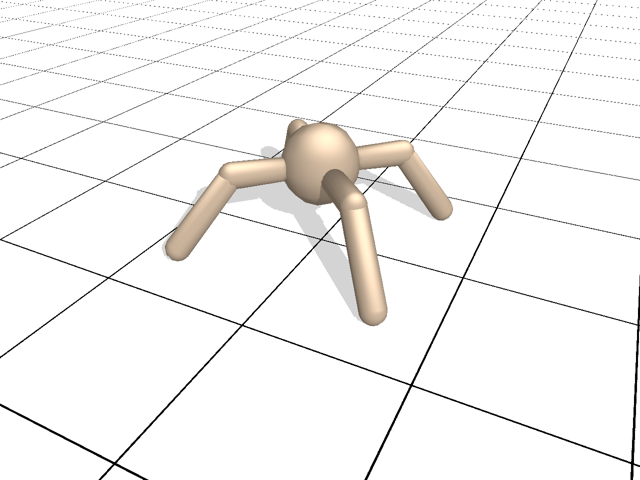

total_reward=tensor(-10.6683, device='cuda:0')
 Rollout length: 25


In [47]:
enjoy_brax()